100%|██████████| 10000/10000 [04:29<00:00, 37.16it/s]


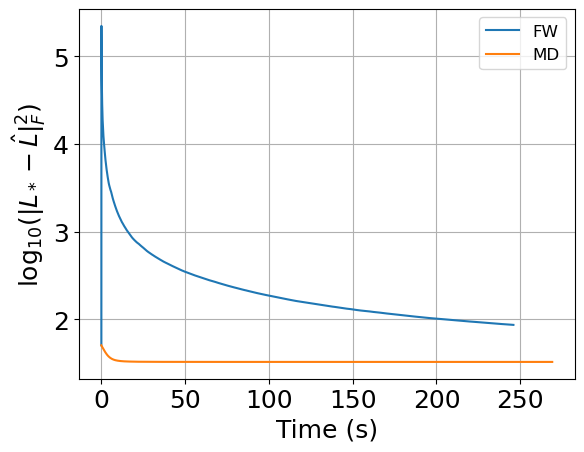

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import scipy as sp
import utils
import cvxpy as cp
import time

SMALL_SIZE = 18
MEDIUM_SIZE = 18
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=12)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) 



# set parameters
# number of nodes
n = 1000

# dense sbm parameters
opt = 'densesbm'
k = 2
p = 0.9
q = 0.1

# trace constraint on laplacian
T = n

# number of iterations for iterative methods
niter = 10000


# create random Laplacian matrix
L = utils.create_graph_lap(n, k, p, q, opt)
L = L / np.trace(L) * T
N = np.random.randn(n,n)*0.01
N = (N + N.T)/2
Ln = L + N

t0 = time.time()
# CVX solver
# x = cp.Variable((n, n), symmetric=True)
# G = np.eye(n)
# H = np.ones((n,n))-np.eye(n)
# prob = cp.Problem(cp.Minimize(cp.norm(x - Ln, 'fro')**2),
#                  [cp.multiply(G, x) >= 0,
#                   cp.multiply(H, x) <= 0,
#                   cp.trace(x) == T])
# prob.solve()
# Lhat_cvx = x.value

# cvx_err = np.linalg.norm(Lhat_cvx - Ln)**2
#print(time.time() - t0)

Lhat1, convfw, timesfw = utils.lap_proj(Ln, T, niter, step = 1, opt = 'fw', ls = False)
Lhat2, convmd, timesmd = utils.lap_proj(Ln, T, niter, step = .1, opt = 'md')

plt.figure()
plt.plot(timesfw, np.log10(convfw), label = 'FW')
plt.plot(timesmd, np.log10(convmd), label = 'MD')
# plt.plot([0, np.max(timesfw)], np.log10([cvx_err, cvx_err]))
plt.ylabel(r'$\log_{10}(\|L_* - \hat{L}\|_{F}^{2})$')
plt.xlabel('Time (s)')
plt.legend()
plt.grid()
plt.savefig('lap_proj_test_1.png', dpi = 300)
plt.show()

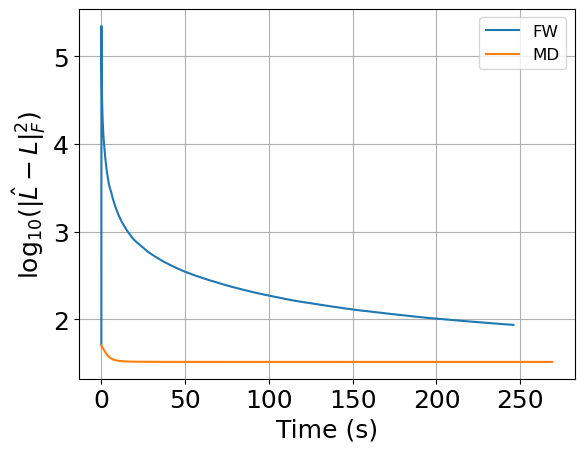

In [4]:
plt.figure()
plt.plot(timesfw, np.log10(convfw), label = 'FW')
plt.plot(timesmd, np.log10(convmd), label = 'MD')
# plt.plot([0, np.max(timesfw)], np.log10([cvx_err, cvx_err]))
plt.ylabel(r'$\log_{10}(\|\hat{L} - L\|_{F}^{2})$')
plt.xlabel('Time (s)')
plt.legend()
plt.grid()
plt.savefig('lap_proj_test_1.png', dpi = 300,bbox_inches="tight")
plt.show()